# Usability & Software-Ergonomie
## Methoden der Usability und User-Experience Evaluation

Psychologische Ergonomie<br>
Julius-Maximilians-Universität Würzburg<br>
Institut für Mensch-Computer-Medien<br>

### Dokumentation der Datenauswertung
Valentin Roß<br>
Carina Sonntag<br>
Carina Spangenberger<br>
Severin Simmler<br>
Felix Werner

In [1]:
import pathlib
import usability
import pandas as pd
import numpy as np

%matplotlib inline

## Analytische Methode

### Schweregrad der Probleme

<Figure size 432x288 with 0 Axes>

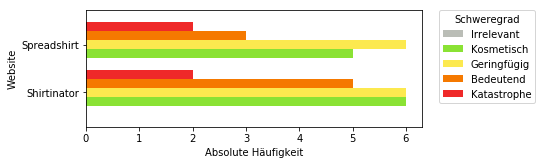

<Figure size 432x288 with 0 Axes>

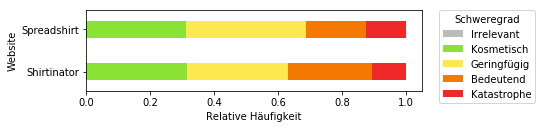

In [2]:
path = pathlib.Path("data", "analytisch", "severity.csv")
data = pd.read_csv(path, index_col=0)

usability.plot_severity(data)

### Gefundene Probleme

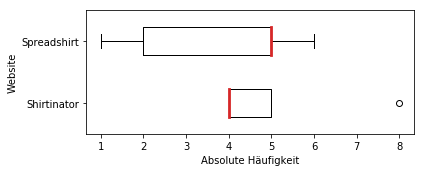

In [3]:
path = pathlib.Path("data", "analytisch", "found-problems.csv")
data = pd.read_csv(path, index_col=0)

usability.plot_problems(data)

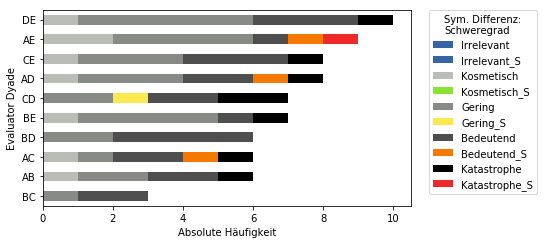

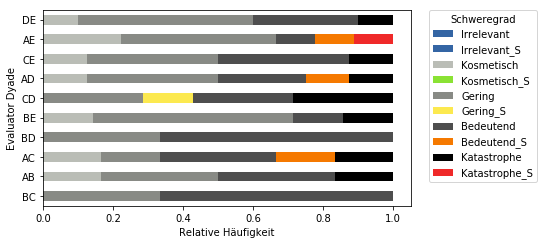

In [4]:
path = pathlib.Path("data", "analytisch", "übereinstimmung-spreadshirt.csv")
data = pd.read_csv(path, index_col=0)

usability.plot_concordance(data)

## Empirische Methode

### Optimale Stichprobengröße mithilfe Pilotstudiendaten ermitteln

In [5]:
directory = pathlib.Path("data", "empirisch", "pilot")
sample = usability.Sample(directory)

#### Trennschärfe

Hier werden bei einem Signifikanzniveau von $\alpha = 0,1$ unterschiedliche Stichprobengrößen in Bezug auf die statistische Trennschärfe für jeden Datensatz dargestellt. In der Legende wird Cohens $d$ als Effektgröße angegeben.

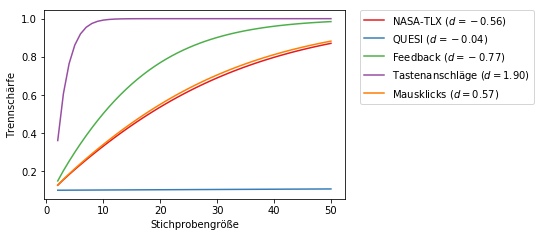

In [6]:
fig = sample.plot_power(alpha=0.1,
                        sample_sizes=np.array(range(2, 51)),
                        figsize=(7.7, 3.4))

Obwohl dem Ergebnis bei einer Stichprobengröße von nur 2 nicht viel Bedeutung beigemessen werden kann, wollen wir $power > 0,5$.

Schließlich wird die Methode `optimal_size()` des `Sample` Objekts aufgerufen, um die optimalen Stichprobengrößen für _jede_ Datenerhebung zu berechnen und der Median zurückgegeben.

In [7]:
result = sample.optimal_size(alpha=0.1, power=0.6)
result["median size"]

23.856596915488545

### Deskriptive Datenanalyse

In [8]:
directory = pathlib.Path("data", "empirisch", "collection")
sample = usability.Sample(directory)

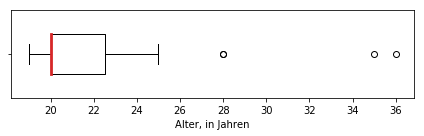

In [9]:
usability.plot_age(sample)

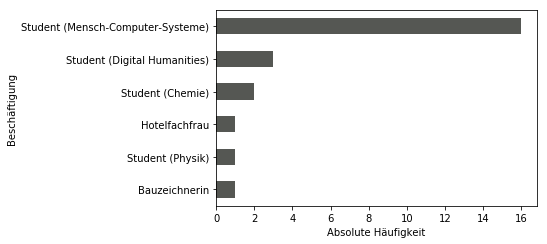

In [10]:
usability.plot_occupation(sample)

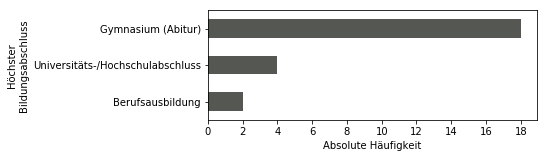

In [11]:
usability.plot_education(sample)

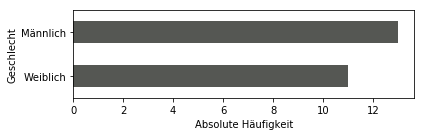

In [12]:
usability.plot_gender(sample)

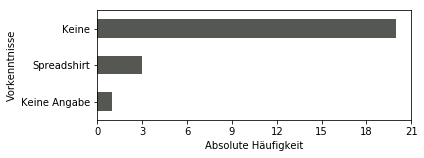

In [13]:
usability.plot_experience(sample)

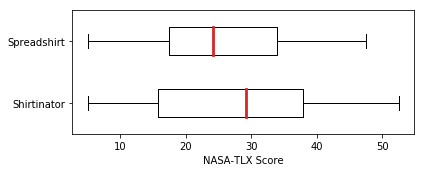

In [14]:
usability.plot_nasa_tlx(sample)

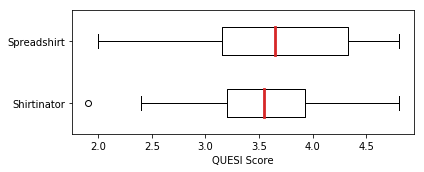

In [15]:
usability.plot_quesi(sample)

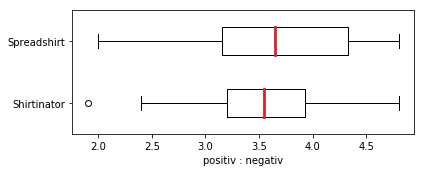

In [16]:
usability.plot_feedback(sample)

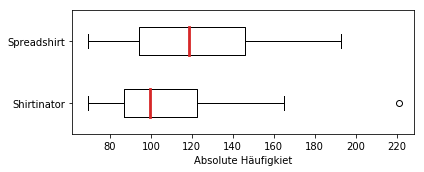

In [17]:
usability.plot_clicks(sample)

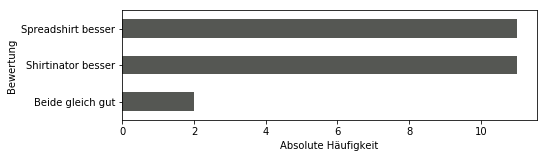

In [18]:
usability.plot_choice(sample)

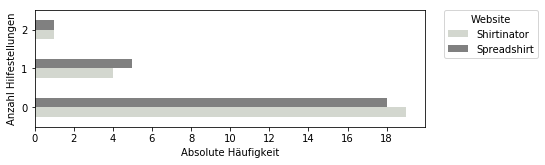

In [19]:
usability.plot_assistance(sample)

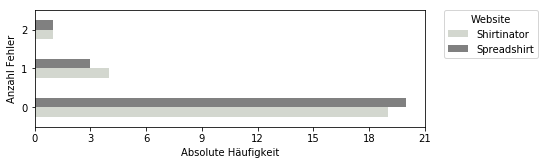

In [20]:
usability.plot_mistakes(sample)

### Voraussetzungen für den t-Test überprüfen

In [21]:
collections = [sample.nasa, sample.quesi, sample.feedback,
               sample.mouse, sample.assistance, sample.mistakes]
columns = ["score", "score", "ratio", "clicks", "n", "n"]

#### Normalverteilung

In [22]:
usability.normal_distribution(collections, columns, alpha=0.05)

,gaussian,p,stat
NASA-TLX-spreadshirt-score,True,0.368,0.956
NASA-TLX-shirtinator-score,True,0.438,0.96
QUESI-spreadshirt-score,True,0.705,0.972
QUESI-shirtinator-score,True,0.946,0.983
Feedback-spreadshirt-ratio,False,0.023,0.901
Feedback-shirtinator-ratio,False,0,0.527
Mouse-spreadshirt-clicks,True,0.419,0.959
Mouse-shirtinator-clicks,False,0.001,0.833
Assistance-spreadshirt-n,False,0,0.58
Assistance-shirtinator-n,False,0,0.531


#### Varianzhomogenität

In [23]:
usability.variance_homogeneity(collections, columns, alpha=0.05)

,homogeneous,p,stat
NASA-TLX-score,True,0.446,0.592
QUESI-score,True,0.589,0.296
Feedback-ratio,True,0.345,0.909
Mouse-clicks,True,0.665,0.19
Assistance-n,True,0.791,0.071
Mistakes-n,True,0.783,0.077


### Induktive Datenanalyse

In [24]:
ALPHA = 0.2

#### NASA-TLX

In [25]:
x = sample.nasa[sample.nasa["website"] == "spreadshirt"]["score"].values
y = sample.nasa[sample.nasa["website"] == "shirtinator"]["score"].values

In [26]:
usability.t_test(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,-0.597,0.556,0.2,True,23


#### QUESI

In [27]:
x = sample.quesi[sample.quesi["website"] == "spreadshirt"]["score"].values
y = sample.quesi[sample.quesi["website"] == "shirtinator"]["score"].values

In [28]:
usability.t_test(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,0.764,0.452,0.2,True,23


#### Feedback

In [29]:
x = sample.feedback[sample.feedback["website"] == "spreadshirt"]["ratio"].values
y = sample.feedback[sample.feedback["website"] == "shirtinator"]["ratio"].values

In [30]:
usability.wilcoxon(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,126.0,0.493,0.2,True,23


#### Mausclicks

In [31]:
x = sample.mouse[sample.mouse["website"] == "spreadshirt"]["clicks"].values
y = sample.mouse[sample.mouse["website"] == "shirtinator"]["clicks"].values

In [32]:
usability.wilcoxon(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,83.0,0.056,0.2,False,23


#### Hilfestellungen

In [33]:
x = sample.assistance[sample.assistance["website"] == "spreadshirt"]["n"].values
y = sample.assistance[sample.assistance["website"] == "shirtinator"]["n"].values

In [34]:
usability.wilcoxon(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,20.5,0.803,0.2,True,23


#### Fehler

In [35]:
x = sample.mistakes[sample.mistakes["website"] == "spreadshirt"]["n"].values
y = sample.mistakes[sample.mistakes["website"] == "shirtinator"]["n"].values

In [36]:
usability.wilcoxon(x, y, alpha=ALPHA)

,stat,p,alpha,equal,df
0,0.0,0.317,0.2,True,23
